**TOPIC MODELLING OF NEWS**

In [ ]:
import os
import pandas as pd
import numpy as np
newsdata = pd.read_json('dataset.json',lines=True, dtype={"category":str, "headline":str,"authors":str,"link":str,"short_description":str,"date":str})

newsdata_train, newsdata_test = np.split(newsdata.sample(frac=1), [int(.6*len(newsdata))])

In [ ]:
newsdata_train.head(1000)

,category,headline,authors,link,short_description,date
54061,BLACK VOICES,Larry Wilmore: 'The Punishment For Being A Bla...,Steven Hoffer,https://www.huffingtonpost.com/entry/larry-wil...,"The host also addressed pundits who claim ""all...",2016-07-07
33559,PARENTS,The Internet Loves This 7-Year-Old Talking Abo...,Taylor Pittman,https://www.huffingtonpost.com/entry/the-inter...,"""She is very intrigued by new things and findi...",2017-02-23
124617,POLITICS,Op-Ed Is Wrong About Air Force Academy Cadets'...,"Michael L. (Mikey) Weinstein, Esq., Contributo...",https://www.huffingtonpost.com/entry/air-force...,,2014-04-22
117767,GOOD NEWS,"Puppy Comforts Dog Having A Nightmare, Because...",Dominique Mosbergen,https://www.huffingtonpost.com/entry/puppy-com...,,2014-07-11
132090,HOME & LIVING,6 Creative Tips for Organizing All That Winter...,"GalTime, Contributor\nContributor",https://www.huffingtonpost.com/entry/organizin...,Instead of pondering how many days until summe...,2014-01-31
...,...,...,...,...,...,...
98121,ARTS,London Says Goodbye to The Scottsboro Boys,"Catherine Schreiber, ContributorProducer, Writ...",https://www.huffingtonpost.com/entry/london-sa...,"At the end of the show, the cast sings ""Say Go...",2015-02-21
179723,STYLE & BEAUTY,Spice Up Your Spring with Sporty Style,"Melissa Liebling-Goldberg, Contributor\nEditor...",https://www.huffingtonpost.com/entry/spice-up-...,My two passions in life happen to coincide for...,2012-09-12
4360,ENTERTAINMENT,Gary Oldman's Son Says Actor's Alleged Domesti...,Cole Delbyck,https://www.huffingtonpost.com/entry/gary-oldm...,The Oscar-winning actor's ex-wife claims he as...,2018-03-07
62120,POLITICS,Most Voters Don't Think Donald Trump Respects ...,Ariel Edwards-Levy,https://www.huffingtonpost.com/entry/donald-tr...,The GOP frontrunner has a serious gender problem.,2016-04-06


In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(400)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
news=newsdata_train["short_description"].tolist()
news

['The host also addressed pundits who claim "all lives matter."',
 '"She is very intrigued by new things and finding out the hows and whys."',
 '',
 '',
 'Instead of pondering how many days until summer, consider cleaning up your mess -- starting with organizing all that winter gear. To keep your hats, gloves, scarves and snow boots in order, here are the best ways to stop the blizzard of clutter.',
 "If Donald Trump can be offensive and crude, why can't he?",
 'More than two dozen children were also wounded in the attack.',
 '',
 'We love nachos so much, we want to invent a new kind every month.',
 'Check out the whimsical jewelry below. Would you wear "Little Third Ear" earrings? PHOTOS: Of course the double-ear effect',
 "It's hypnotic.",
 "We're so united I want to vomit!",
 'As ad blocking in the U.K. continues to gain traction,\xa0The Guardian is eyeing how to create more customized ad experiences',
 'She\'s one of five women prosecutors are allowed to call as witnesses to "prior

In [ ]:
stemmer = SnowballStemmer("english")
def lemmatization(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocessing(text):
    result=[]
    for i in gensim.utils.simple_preprocess(text) :
        if i not in gensim.parsing.preprocessing.STOPWORDS and len(i) > 3:
            result.append(lemmatization(i))
            
    return result

In [ ]:
len(news)

119268

In [ ]:
pure_words = []

for i in news:
    pure_words.append(preprocessing(i))

In [ ]:
pure_words

[['host', 'address', 'pundit', 'claim', 'live', 'matter'],
 ['intrigu', 'thing', 'find', 'how', 'whys'],
 [],
 [],
 ['instead',
  'ponder',
  'day',
  'summer',
  'consid',
  'clean',
  'mess',
  'start',
  'organ',
  'winter',
  'gear',
  'hat',
  'glove',
  'scarv',
  'snow',
  'boot',
  'order',
  'best',
  'way',
  'stop',
  'blizzard',
  'clutter'],
 ['donald', 'trump', 'offens', 'crude'],
 ['dozen', 'children', 'wound', 'attack'],
 [],
 ['love', 'nacho', 'want', 'invent', 'kind', 'month'],
 ['check',
  'whimsic',
  'jewelri',
  'wear',
  'littl',
  'earring',
  'photo',
  'cours',
  'doubl',
  'effect'],
 ['hypnot'],
 ['unit', 'want', 'vomit'],
 ['block',
  'continu',
  'gain',
  'traction',
  'guardian',
  'eye',
  'creat',
  'custom',
  'experi'],
 ['women', 'prosecutor', 'allow', 'wit', 'prior', 'act'],
 ['rest', 'america', 'faith', 'process'],
 ['revamp',
  'labor',
  'board',
  'issu',
  'slew',
  'polici',
  'collect',
  'bargain',
  'harder'],
 [],
 ['item',
  'favorit',
 

In [ ]:
dict1 = gensim.corpora.Dictionary(pure_words)
dict1.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000) #removing too rare and too common words
doc2bowcorpus = [dict1.doc2bow(i) for i in pure_words]

In [ ]:
lda_model =  gensim.models.LdaMulticore(doc2bowcorpus, 
                                   num_topics = 20, 
                                   id2word = dict1,
                                   passes=2)

In [ ]:
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.028*"food" + 0.024*"travel" + 0.017*"world" + 0.015*"citi" + 0.013*"place" + 0.012*"save" + 0.012*"great" + 0.012*"visit" + 0.011*"trip" + 0.010*"market"


Topic: 1 
Words: 0.021*"offer" + 0.015*"walk" + 0.015*"space" + 0.012*"honor" + 0.012*"round" + 0.011*"park" + 0.011*"pictur" + 0.010*"week" + 0.009*"town" + 0.009*"sunday"


Topic: 2 
Words: 0.025*"student" + 0.021*"democrat" + 0.019*"clinton" + 0.016*"colleg" + 0.016*"game" + 0.015*"republican" + 0.014*"senat" + 0.013*"hillari" + 0.012*"climat" + 0.011*"parti"


Topic: 3 
Words: 0.055*"look" + 0.031*"better" + 0.020*"like" + 0.015*"see" + 0.014*"star" + 0.013*"fashion" + 0.013*"time" + 0.013*"week" + 0.011*"get" + 0.011*"inspir"


Topic: 4 
Words: 0.018*"women" + 0.014*"base" + 0.012*"surpris" + 0.011*"communiti" + 0.011*"claim" + 0.008*"credit" + 0.008*"say" + 0.008*"member" + 0.008*"execut" + 0.008*"support"


Topic: 5 
Words: 0.030*"question" + 0.025*"post" + 0.022*"polic" + 0.018*"shoot" + 0.017*"offic" + 0.

**Topics**
<br>
0: travel <br>
1: environment<br>
2: politics<br>
3: style<br>
4: women<br>
5: crime<br>
6: tech<br>
7: human rights<br>
8: parenting <br>
9: education<br>
10: science<br>
11: entartainment<br>
12: health<br>
13: politics 2<br>
14: money / business<br>
15: gun crime<br>
16: healthy living<br>
17: social media<br>
18: magazine<br>
19: black&latin voices<br>






In [ ]:
pip install pyLDAvis

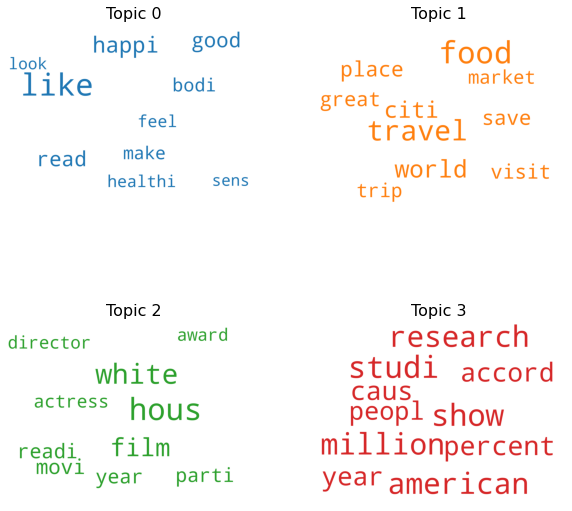

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

In [ ]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model,doc2bowcorpus,dictionary=lda_model.id2word) 
vis  #we couldn't find out how to match the topic numbers with visualization because pyLDAvis prepares 
#a new gensim in this function. but it is a good way to see the related words



PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
14    -0.187546  0.128098       1        1  7.978775
9     -0.182656  0.070611       2        1  6.571453
8     -0.160859  0.107151       3        1  6.088711
11    -0.152578 -0.089049       4        1  5.737086
3     -0.153850 -0.126874       5        1  5.403093
19     0.106617  0.150678       6        1  5.233780
10     0.151655  0.062818       7        1  5.229830
0     -0.043195 -0.038555       8        1  5.186731
12    -0.210225  0.072318       9        1  5.178141
13     0.204973  0.039190      10        1  5.024466
4      0.197312  0.085014      11        1  4.955108
15     0.190558  0.003432      12        1  4.785470
7      0.018273  0.152186      13        1  4.653869
18     0.104803 -0.162631      14        1  4.195386
2      0.100855  0.003287      15        1  4.137017
16    -0.093429  0.080745      16        1  4.075770
1      0.030966 -0.158000      17        1  4.037127
6      0.032908 -0.032194      18        1  3.998902
5      0.090812 -0.035557      19        1  3.987175
17    -0.045394 -0.312669      20        1  3.542116, topic_info=           Term         Freq        Total Category  logprob  loglift
42         want  4221.000000  4221.000000  Default  30.0000  30.0000
39         love  3311.000000  3311.000000  Default  29.0000  29.0000
32        trump  3026.000000  3026.000000  Default  28.0000  28.0000
94         look  3648.000000  3648.000000  Default  27.0000  27.0000
149        life  3758.000000  3758.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1758       burn   190.178848   249.862030  Topic20  -5.1905   3.0675
574        home   384.576904  1970.004272  Topic20  -4.4864   1.7068
2662  breakfast   156.135513   186.315170  Topic20  -5.3878   3.1637
924        week   220.367142  3316.710693  Topic20  -5.0432   0.6290
50         wear   163.842621   768.575806  Topic20  -5.3396   1.7948

[1169 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1624     13  0.997001      accept
1624     19  0.002014      accept
815       2  0.994981  accomplish
1055      7  0.956167      accord
1055     11  0.035189      accord
...     ...       ...         ...
1031     14  0.005264       young
1031     15  0.053958       young
1031     19  0.153979       young
379       7  0.995536       youth
1512      1  0.994676      youtub

[3195 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 10, 9, 12, 4, 20, 11, 1, 13, 14, 5, 16, 8, 19, 3, 17, 2, 7, 6, 18])

**Testing LDA Model**

In [ ]:
bow_vector = dict1.doc2bow(preprocessing(str(newsdata_test['short_description'])))
print(lda_model[bow_vector])
for index, score in sorted(lda_model[bow_vector]):
  #  print(str(newsdata_test['short_description']))
 #   print(index)
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5))) #scores of topics and most related words to topics



[(0, 0.10600135), (1, 0.033723), (2, 0.035589706), (3, 0.046501555), (4, 0.041071035), (5, 0.08547163), (6, 0.08081409), (8, 0.13220604), (9, 0.057833802), (12, 0.06887057), (15, 0.04106856), (17, 0.11259482), (18, 0.072579876), (19, 0.07710254)]
Score: 0.10599625110626221	 Topic: 0.028*"food" + 0.024*"travel" + 0.017*"world" + 0.015*"citi" + 0.013*"place"
Score: 0.033722180873155594	 Topic: 0.021*"offer" + 0.015*"walk" + 0.015*"space" + 0.012*"honor" + 0.012*"round"
Score: 0.035588473081588745	 Topic: 0.025*"student" + 0.021*"democrat" + 0.019*"clinton" + 0.016*"colleg" + 0.016*"game"
Score: 0.04650019854307175	 Topic: 0.055*"look" + 0.031*"better" + 0.020*"like" + 0.015*"see" + 0.014*"star"
Score: 0.04107082262635231	 Topic: 0.018*"women" + 0.014*"base" + 0.012*"surpris" + 0.011*"communiti" + 0.011*"claim"
Score: 0.08546411991119385	 Topic: 0.030*"question" + 0.025*"post" + 0.022*"polic" + 0.018*"shoot" + 0.017*"offic"
Score: 0.0808100700378418	 Topic: 0.016*"forc" + 0.015*"latest" +